<img src="https://static.wincacademy.nl/logos/main-logo.png" height=200px style="height: 200px"/>

# Assignment: Retail

Congratulations! You've reached the final assignment for the course before the bonus modules. Here we'll ask you to work with a dataset from the Dutch *Centraal Bureau voor de Statistiek* (CBS, English: Statistics Netherlands). It contains monthly growth percentages for various branches of the retail sector. You'll be required to answer open questions as well as write code that handles the data and crunches numbers.

*Answer open questions as though you were writing a report. Answers that are too vague, too short or too sloppy will be rejected.*

## 0. Load required modules

First, we need to load some modules that we're going to use. Do that in the next code cell. If you don't know yet which modules you'll use, just read on and come back here to import them later. **Don't forget to run the cell whenever you make an edit!**

In [1]:
# Your import statements here.
import csv
import locale 
import numpy
from datetime import datetime, timedelta
import pandas as pd 

locale.setlocale(locale.LC_ALL, 'nl_NL.UTF-8')


'nl_NL.UTF-8'

## 1. Data Preparation
Now we need to load and parse the data. The data should be located in the same folder as this notebook (whether that's on Google Colab or your local machine). Make sure you have working file path from your notebook to the supplied `data.csv` file. Put an `x` in the checkbox below when you're ready.

- [x] *I have a working file path to the `data.csv` file.*

You are now ready to proceed with reading the data into your program.

### 1.1 Read the CSV

The data comes in the form of a `csv`-file. CSV stands for 'comma separated values'. Oddly enough it need not be the case that the values are *really* separated by commas. In this case, the **delimiter** - the character that separates the columns within a datapoint - is *not* a comma. It's up to you to inspect `data.csv` and find out what the delimiter is.

Once you know what the delimiter is, you can use Python's `csv` module to read each of the datapoints to a dictionary. Some tips:

- The module's name is `csv`.
- You can find its documentation [here](https://docs.python.org/3/library/csv.html)
- We suggest you use the `DictReader` class. There's an example on how to use `DictReader` in the linked documentation.
- Instead of printing the rows (like in the example), we suggest you store all the rows as `dict`s in a `list`.

**1. In the code cell below, write code that opens and reads the data. By the end of the cell, you should have a variable `data` that is a list of dictionaries that each contain a datapoint.**

In [2]:
retail_csv = './retail-data.csv'
data = []

with open(retail_csv, newline='') as open_csv: 
  reader = csv.DictReader(open_csv, delimiter=';')
  for row in reader: 
    data.append(dict(row)) # Forced normal dict instead of OrderedDict (default)

### 1.2 Parse and clean the data

You now have a list of dictionaries that each contain some data. But what data? Answer the following questions to become familiar with this dataset. It requires you to write and execute Python code (you can add code cells if you wish), and also search the web for terms you're not familiar with.

**2. What are the column names in this dataset, and what do they mean? Be specific.**

*1. Bedrijfstakken/branches (SBI 2008)*

Deze kolom vermeldt de geanalyseerde bedrijfstakken/branches volgens de Standaard Bedrijfsindeling (SBI) van het CBS. Ieder bedrijf in Nederland heeft een SBI-code die specifiek aangeeft wat de activiteit van het bedrijf is. De code is hiërarchisch opgebouwd. De eerste twee cijfers geven de algemene branche aan, de laatste 2 of 3 cijfers geven de specifieke tak aan binnen die branche. Voorbeeld: 4711. 47 is de branchecode voor Detailhandel (niet in auto's). 4711 is de specifieke code voor 'Supermarkten en dergelijke winkels met een algemeen assortiment voedings- en genotmiddelen'. Het is voor bedrijven die meerdere bedrijfsactiviteiten hebben mogelijk meerdere SBI codes te hebben. 

*2. Perioden*

Deze kolom geeft de periode aan waarover de data in de kolom gaat in 'jaar maand' formaat (voorbeeld: '2010 oktober'). 

De volgende twee kolommen bevatten cijfers over de waardeontwikkeling van de detailhandel. Deze ontwikkeling wordt weergegeven door middel van indexcijfers met als basisjaar 2015. Een indexcijfer geeft de verhouding weer tussen de waarde op het moment van meten (het moment van meten is aangegeven in de kolom *Perioden*) en de waarde van dezelfde variabele in de basisperiode (in dit geval 2015). Deze basisperiode heeft het indexcijfer 100. Omzet is de opbrengst uit verkoop van goederen en diensten exclusief btw. In deze dataset is er niet gecorrigeerd voor koopdag- en/of seizoenseffecten (Omzet ongecorrigeerd).

*3. Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)*

Deze kolom vermeldt het indexcijfer die de verhouding tussen de huidige omzetwaarde en de omzetwaarde in de basisperiode (2015). De omzetwaarde is de ontwikkeling van de geldopbrengst van de omzet. 

*4. Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)*

Deze kolom vermeldt het indexcijfer die de verhouding tussen het huidige omzetvolume en het omzetvolume in de basisperiode (2015). Het omzetvolume is de ontwikkeling van de hoeveelheid verkochte goederen/diensten. De ontwikkeling is niet waargenomen, maar berekend. De hoeveelheid verkochte goederen/diensten in een bepaalde periode wordt berekent door de waarde van de omzet (zie vorige kolom) te delen door de prijs. 


**3. For each column, list what data type it should have (`str`, `int`, `float` or `datetime.date`).**

* Bedrijfstakken/branches (SBI 2008): zou 'str' moeten zijn, omdat er soms meerdere SBI codes vernoemd worden maar soms ook SBI codes ontbreken en alleen de uitgeschreven bedrijfstak/branche vermeld is. Om zoveel mogelijk data in de dataset te kunnen gebruiken, is het beter om de volledige string te gebruiken. 
* Perioden: datetime.date 
* Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100): float, omdat het indexcijfer wordt berekend tot 1 decimaal. 
* Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100): float, omdat het indexcijfer wordt berekend tot 1 decimaal. 
    
**4. In the code cell below, write code that changes the column names to something more convenient for writing readable code. Be sure to choose English, correct and meaningful names.**

In [3]:
# Change key names for each dictionary in data (list)
new_headers = ['SBI','date','index_value','index_volume']

data = [dict(zip(new_headers, list(line.values()))) for line in data]

**5. In the code cell below, write code that casts all the data to the right type.**

Tips:
- If you overwite your data, running the casting operation you're about to implement more than once might result in errors. In that case you can opt not to reuse a variable or restart and rerun your notebook for every retry.
- The data is in Dutch. For some columns this does not matter, but for one in particular it makes parsing it a little bit harder. There is a way to handle this in a few lines of code. You'll need Python's `locale` module for this, as well as the special string `'nl_NL.UTF-8'`. If you're not sure how to use this information after searching the web for a while, it's OK to take the long way around and write custom code to handle the Dutch words. *Note: Google Colab does not support the Dutch locale at this time. If you use Google Colab, you unfortunately can't use the `locale` trick and must write extra code yourself to handle the Dutch dates.*
- The parsing script is bound to run into errors. **Do not modify the data file on disk.** Carefully read the error, examine why it works on most values and crashes on some others, and apply a fix in your code! We'll give you some tips:
    - A handful of values in the `Perioden`-column might cause an error due to an unexpected character. You can safely ignore that character.
    - Handle missing numerical values by replacing them with `-1.`. Be sure to maintain the correct datatype for that column!

In [4]:
# For key in dict for dict in list: cast value to right data type 
# SBI is al een string en hoeft niet te worden aangepast. 

for datapoint in data: 
    # Remove all special characters/spaces from Perioden string 
    # Datetime kan alleen als volledige datum+tijd handelen, alleen jaar+maand zijn relevant voor deze dataset.
    datapoint['date'] = datetime.strptime(''.join(character for character in datapoint['date'] if character.isalnum()),'%Y%B')

    # Check of er een value in datapoint zit en cast naar Float 
    if any(character.isdigit() for character in datapoint['index_value']): 
        datapoint['index_value'] = float(datapoint['index_value'])
    else: datapoint['index_value'] = float(-1)

    if any(character.isdigit() for character in datapoint['index_volume']): 
        datapoint['index_volume'] = float(datapoint['index_volume'])
    else: datapoint['index_volume'] = float(-1)

## 2. Data Exploration

You are now ready to explore the data.

**6. In the code cell below, print the following metadata. Format the printed text in a nice and tidy way. Put an `x` in the checkboxes when you've succeeded.**

- [x] **The number of datapoints in the dataset.**
- [x] **The number of unique branches of the retail sector the data covers.**
- [x] **The first month covered by the data.**
- [x] **The last month covered by the data.**

In [5]:
amount_datapoints = 0 
unique_branches = []
unique_dates = []

for datapoint in data: 
    amount_datapoints += 1
    if datapoint['SBI'] not in unique_branches: 
        unique_branches.append(datapoint['SBI'])
    if datapoint['date'] not in unique_dates: 
        unique_dates.append(datapoint['date'])

first_month = min(unique_dates).strftime('%B %Y')
last_month = max(unique_dates).strftime('%B %Y')

# Print metadata in a tidy way: 

print(f'Number of datapoints in the dataset: {amount_datapoints}.') 
print(f'Number of unique branches of the retail sector in the dataset: {len(unique_branches)}.')
print(f'First month covered by the data: {first_month}.')
print(f'Last month covered by the data: {last_month}.')

Number of datapoints in the dataset: 3120.
Number of unique branches of the retail sector in the dataset: 16.
First month covered by the data: januari 2005.
Last month covered by the data: maart 2021.


**7. In the code cell below, extract the revenue numbers for the following two sectors and put them in a list named exactly as indicated. Also create a list that contains all the months in ascending order. Run the cell after it to see a plot of the numbers if you did it correctly.**

- [x] Months in ascending order $\Longrightarrow$ `months`
- [x] Clothing stores $\Longrightarrow$  `clothing_stores_revenue`
    - Tip: the Dutch word for *'clothing'* is *'kleding'*
- [x] Mail order companies and web shops $\Longrightarrow$ `mail_order_revenue`
    - Tip: the Dutch term for *'mail order companies'* is *'postorderbedrijven'*

In [6]:
clothing_stores_revenue = []
mail_order_revenue = []
months = []

for datapoint in data: 
    if 'kleding' in datapoint['SBI'].lower(): 
        clothing_stores_revenue.append(datapoint['index_value'])
        if datapoint['date'].strftime('%Y-%m') not in months: 
            months.append((datapoint['date']).strftime('%Y-%m'))
    if 'postorderbedrijven' in datapoint['SBI'].lower():
        mail_order_revenue.append(datapoint['index_value'])
        if datapoint['date'].strftime('%Y-%m') not in months: 
            months.append((datapoint['date']).strftime('%Y-%m'))


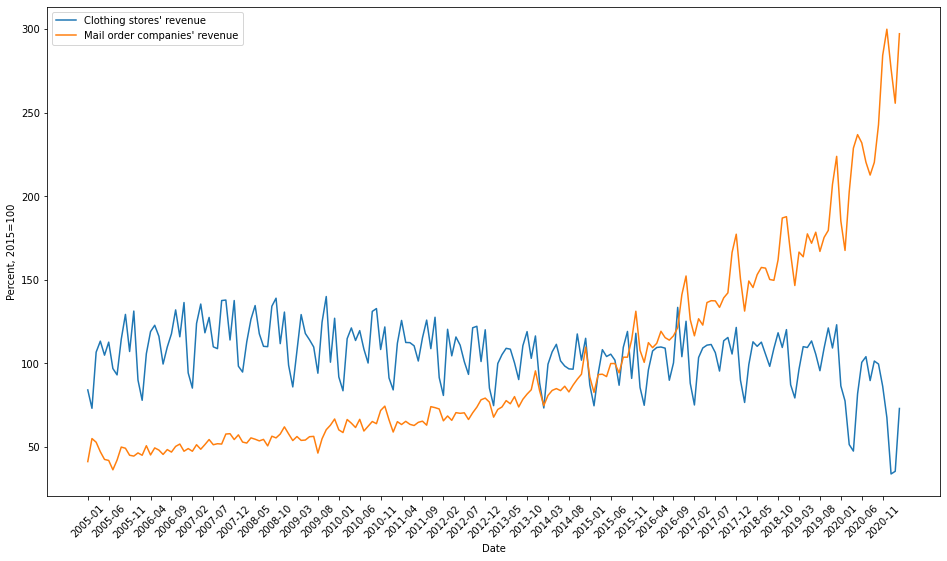

In [7]:
# Do not modify the code in this cell.
import matplotlib.pyplot as plt
%matplotlib inline

try:
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(months, clothing_stores_revenue, label="Clothing stores' revenue")
    ax.plot(months, mail_order_revenue, label="Mail order companies' revenue")
    ax.set_xlabel('Date')
    ax.set_xticks(numpy.arange(0, len(months), 5)) # Voor leesbaarheid minder data op de x-as
    plt.xticks(rotation=45) # Voor leesbaarheid rotatie x-as labels 45 graden 
    ax.set_ylabel('Percent, 2015=100')
    ax.legend()
    plt.show()
except Exception as e:
    print('There was an error creating the plot.\n'
          'Check if your lists are correctly named and assembled.\n'
          "Here's your error, for your debugging pleasure.")
    raise e

**8. How do the two branches compare? Discuss any yearly cycles you observe, as well as long-term developments. Also explain why you think these patterns are there. Pretend you are writing this to your supervisor or a client who asked you to analyze this dataset.**

Ten opzichte van 2015 zijn winstpercentages van de kledingbranche gestegen en deze zijn ook redelijk stabiel. Wel lijkt het tussen 2005 en 2020 over het algemeen jaarlijks licht te dalen. We zien per jaar duidelijke pieken in de winst van de kledingbranche rond het einde van het jaar, waarbij de kledingbranche ten opzichte van 2015 minder winst genereert en in de zomermaanden meer winst genereert. De jaarlijkse pieken en dalen rondom de de zomer- en wintermaanden blijken stabiel over de jaren 2005 tot en met 2019. De verschillen tussen de winter- en zomermaanden zouden mogelijk verklaard kunnen worden doordat mensen nieuwe kleren kopen voor het begin van de zomer, rond mei hun vakantiegeld ontvangen en daarom meer te besteden hebben. Daarentegen hebben mensen na de dure decemberperiode vaak minder te besteden en is vanuit dat opzicht mogelijk ook te verklaren dat er in de wintermaanden rondom januari minder winst gegenereerd wordt door de kledingbranche. In tegenstelling dit besproken patroon zien we dat het dal van de wintermaanden van 2019 zich niet herstelt in het voorjaar of de zomer van 2020. Dit dal zet juist verder door, resulterend in winstpercentages van meer dan -50% ten opzichte van 2015. Dit valt te verklaren door de coronacrisis die de sluiting tot winkels tot gevolg had in de lockdown alsook een grote afname in winkelend publiek als gevolg van epidemische maatregelen wanneer de winkels wel geopend waren. 

De postorderbranche laat een stijging zien in de winstpercentages vanaf 2005, waarbij de winst een lichte stijging heeft in de jaren 2005-2015 en vanaf 2015 grote stappen maakt in de stijging van de winstpercentages. Een goede verklaring voor deze stijging, zeker sinds 2015, is het steeds populairder worden van online winkelen en thuis laten bezorgen van pakketten. Er zijn, in tegenstelling tot de kledingbranche, minder jaarlijkse patronen te zien, alhoewel er jaarlijks rond de kerstperiode een piek lijkt te zijn. Een verklaring hiervoor zou kunnen zijn dat in de decemberperiode veel cadeaus voor Sinterklaas of Kerst door mensen online besteld worden. De lichte daling in de winstpercentages van de kledingbranche zouden mogelijk ook verklaard kunnen worden door de trend dat mensen steeds meer online winkelen en kleding thuis laten bezorgen in plaats van deze in een kledingwinkel te kopen, een trend die te zien valt in de grote stijging van de winstpercentages van de postorderbranche. 

## 3. Computing With Data

### 3.1 Year Over Year Change

Let's take a closer look at these two branches of retail: clothing stores and mail order companies. A commonly used metric in business is the year-over-year revenue change. It is computed like so:

$$\text{YoY}_\text{month} = \frac{\text{Revenue}_\text{month}}{\text{Revenue}_\text{same month last year}} \times 100$$

Search the web for a longer explanation of this term if you'd like one.

**9. Why should we compare revenue for a particular month to the revenue of that same month, one year ago?**

Bij sommige producten/bedrijven is winst seizoensgebonden of periodegebonden. Bijvoorbeeld: postorderbedrijven genereren waarschijnlijk de meeste winst in december (kerst- en nieuwjaarskaarten die verstuurd worden, pakketten die bezorgd worden voor Sinterklaar- en Kerstcadeaus). Daarom is het vaak interessant om te kijken hoe de winst voor deze periode zich in een bepaald jaar verhoudt tot de winst in een voorgaand jaar in dezelfde periode. Je kan via YoY specifieker zien in welke maand de meeste winst wordt gegenereerd en waar de groei precies plaatsvindt, in tegenstelling tot een analyse die een heel jaar beslaat. 

**10. In the code cell below, compute the year-over-year revenue change for every month, for both branches of the retail sector, each in their own new list. Skip the first year (why?). Put an `x` in the checkboxes when you're ready. Run the next cell to see a new plot for your data.**

- [x] Clothing stores $\Longrightarrow$ `clothing_stores_yoy`
- [x] Mail order companies $\Longrightarrow$ `mail_order_yoy`



In [8]:
def calculate_yoy(keyword_SBI, dataset): 
    yoy_list = []
    for month in dataset: # Retreive revenue for month x 
        if keyword_SBI in month['SBI'].lower() and month['date'] > datetime(2005, 12, 1, 0, 0): 
            date_last_year = datetime(month['date'].year-1, month['date'].month, 1,0,0)
            revenue_now = month['index_value']

            for month in dataset: # Retrieve revenue for month x last year
                if month['date'] == date_last_year and keyword_SBI in month['SBI'].lower():
                    revenue_last_year = month['index_value']
                    yoy = (revenue_now / revenue_last_year) * 100
                    yoy_list.append(yoy)
    return yoy_list

clothing_stores_yoy = calculate_yoy('kleding', data)
mail_order_yoy = calculate_yoy('postorderbedrijven', data)


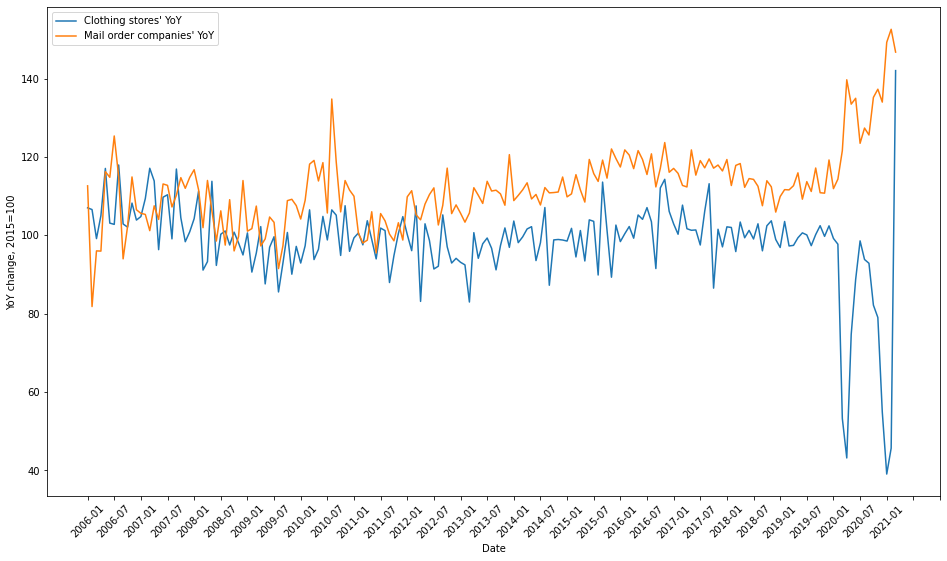

In [9]:
try:
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(months[12:], clothing_stores_yoy, label="Clothing stores' YoY")
    ax.plot(months[12:], mail_order_yoy, label="Mail order companies' YoY")
    ax.set_xlabel('Date')
    ax.set_ylabel('YoY change, 2015=100')
    ax.set_xticks(numpy.arange(0, len(months), 6)) # Voor leesbaarheid data per 6 maanden op de x-as
    plt.xticks(rotation=45) # Voor leesbaarheid rotatie x-as labels 45 graden 
    ax.legend()
    plt.show()
except Exception as e:
    print('There was an error creating the plot.\n'
          'Check if your lists are correctly named and assembled.\n'
          "Here's your error, for your debugging pleasure.")
    raise e

**11. In the code cell below, find the best and worst months for both branches of the retail sector in terms of year-over-year revenue change. Print the branch, month and YoY in a nice and tidy way.**

In [10]:
def print_yoy_outcome(list_of_yoys, branche): 
    dict_dates_yoys = dict(zip(months[12:], list_of_yoys))
    max_month = max(dict_dates_yoys, key=dict_dates_yoys.get)
    max_yoy = round(max(list_of_yoys),2)
    min_month = min(dict_dates_yoys, key=dict_dates_yoys.get)
    min_yoy = round(min(list_of_yoys),2)

    
    print(f'The best month for the {branche} branche was {max_month}. The YoY value for that month was {max_yoy}.\nThe worst month for the {branche} branche was {min_month}. The YoY value for that month was {min_yoy}')

print_yoy_outcome(clothing_stores_yoy, 'Clothing stores')
print_yoy_outcome(clothing_stores_yoy, 'Mail order companies and webshops')

The best month for the Clothing stores branche was 2021-03. The YoY value for that month was 142.02.
The worst month for the Clothing stores branche was 2021-01. The YoY value for that month was 39.08
The best month for the Mail order companies and webshops branche was 2021-03. The YoY value for that month was 142.02.
The worst month for the Mail order companies and webshops branche was 2021-01. The YoY value for that month was 39.08


### 3.2 Similarity Between Branches

We've seen that the pattern for revenue is quite different for clothing stores and mail order companies. In other words: their revenues don't move up or down together. A way to make this observation more specific is to compute the **correlation coefficient**. It is a number between $-1$ and $1$ that describes the relation between two *random variables*. Here is how it works applied to our revenue numbers:

- If the correlation coefficient for the revenue of two branches of the retail sector is $1$, their revenue is *positively correlated*. This means that when the revenue of branch A goes up, the revenue of branch B also goes up. In other words: the revenues for both branches go up together.
- If the correlation coefficient is $-1$, the revenues of the two branches are *negatively correlated*. This means that if A's revenue goes up, B's revenue goes down. Similarly, if B's revenue goes up, A's revenue goes down. They move in the exact opposite direction.
- If the correlation coefficient is $0$, there is no clear pattern between the revenues of both branches.

Here's a table that summarizes this information:

| Correlation coefficient | Meaning                              |
|-------------------------|--------------------------------------|
| $1$                     | Revenues go up together              |
| $0$                     | No pattern                           |
| $-1$                    | Revenues move in opposite directions |

Note that there is a continuous scale between $-1$ and $1$! A correlation coefficient of $0.3$ indicates a somewhat positively correlated relationship.

And here's an image that visualizes the correlation coefficient.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg"/>

We've provided a function `corrcoef` that computes the correlation coefficient for two lists.

**11. In the code cell below, use the function `corrcoef` to compute the correlation coefficient for each pair of branches in our dataset. Then print a sorted table that shows each unique pair and their correlation coefficients. Sort by the correlation coefficient, in descending order. You can take inspiration from this table (but it doesn't have to look exactly like it):**

```
Coeff   Branch A                                          Branch B                                          
===========================================================================================================
0.98    4711, 472 Winkels in voedingsmiddelen             4711 Supermarkten                                 
0.91    475 Winkels in overige huishoudwaren              4752 Winkels in doe-het-zelfartikelen             
0.91    47528 Bouwmarkten                                 4752 Winkels in doe-het-zelfartikelen               
```

In [11]:
import numpy as np

# Provided function. Use this to obtain the correlation coefficient for two lists.
def corrcoef(branch_a, branch_b):
    return np.corrcoef(branch_a, branch_b)[0, 1]

# Create dict with branches and their revenues 
branche_revenue = dict.fromkeys(unique_branches, [])
for branche in branche_revenue: 
    branche_revenue[branche] = [datapoint['index_value'] for datapoint in data if datapoint['SBI'] == branche]

# Create a list containing dicts with all combinations of branches and their corrcoef 
corrcoef_list = []
itter_list = list(branche_revenue.keys())
for branche_a in branche_revenue: 
    itter_list.remove(branche_a)
    for branche_b in itter_list:
        corrcoef_dict = {}
        corrcoef_dict['Coeff'] = corrcoef(branche_revenue[branche_a], branche_revenue[branche_b])  
        corrcoef_dict['Branch A'] = branche_a
        corrcoef_dict['Branch B'] = branche_b 
        corrcoef_list.append(corrcoef_dict )

# Display dicts as rows in pandas dataframe 
df = pd.DataFrame(corrcoef_list).sort_values(by='Coeff', ascending=False, ignore_index=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df) # Display instead of 'print' for readability


,Coeff,Branch A,Branch B
0,0.984100,"4711, 472 Winkels in voedingsmiddelen",4711 Supermarkten
1,0.912311,475 Winkels in overige huishoudwaren,4752 Winkels in doe-het-zelfartikelen
2,0.907017,4752 Winkels in doe-het-zelfartikelen,47528 Bouwmarkten
3,0.886558,475 Winkels in overige huishoudwaren,4759 Winkels overige huishoudartikelen
4,0.872730,4771 Winkels in kleding,4772 Winkels in schoenen en lederwaren
5,0.869190,4711 Supermarkten,"4791 Postorderbedrijven, webwinkels"
6,0.858624,"4711, 472 Winkels in voedingsmiddelen",47741 Drogisterijen
7,0.844600,"4719, 474-477 Winkels in non-foodart.",4759 Winkels overige huishoudartikelen
8,0.840273,"Winkels in meubels, woninginrichting alg",4759 Winkels overige huishoudartikelen
9,0.840040,"4711, 472 Winkels in voedingsmiddelen","4791 Postorderbedrijven, webwinkels"


**12. Pick two correlation coefficients from the table you created and explain why you think these values are the way that they are. Be sure to pick two coefficients that are not close to each other.**

Er wordt gesproken van een hoge correlatie als de correlatiegraad tussen de 0.5 en 1 ligt. Bij een correlatie van (naderend) 1 zien we overlappende sectoren (Winkels in Voedingsmiddelen & Supermarkten). Deze zijn dus niet interessant om te analyseren omdat deze markten waarschijnlijk grotendeels dezelfde retailers betreffen. Een voorbeeld van twee sterk positief correlerende branches zijn 476 Winkels in recreatieartikelen en 4772 Winkels in schoenen en lederwaren. Deze branches hebben een correlatiecoefficient van 0.719195. Een mogelijke verklaring hiervoor zou kunnen zijn dat, wanneer de economie goed gaat en mensen meer te besteden hebben, men zowel nieuwe schoenen als recreatieartikelen koopt. Aangezien dit relatieve luxe- en niet-essentiele goederen zijn, is het aannemelijk dat deze minder winst maken in economisch zwaardere perioden. Wanneer de koopkracht stijgt, geven mensen hier allicht meer geld aan uit. 

Interessant in deze dataset is dat er slechts drie branches zijn die sterk negatief correleren met een andere branche. Branches 476 Winkels in recreatieartikelen, 4765 Speelgoedwinkels en 4772 Winkels in schoenen en lederwaren correleren namelijk alledrie sterk (> -0.5) met 4791 Postorderbedrijven, webwinkels. Sinds een aantal jaar wordt het steeds populairder om artikelen online te bestellen in plaats van in fysieke winkels. Aan deze correlatiecoefficienten is te zien dat, wanneer een van de twee branches meer winst genereert, de andere branche significant minder winst genereert. Het is aannemelijk dat het hier gaat om stijgende winst voor webwinkels en dalende winst voor de recreatieartikelen-, speelgoed- en schoenenwinkels. Deze artikelen die in deze winkels verkocht worden, lenen zich goed om online besteld te worden wat de consument veel tijd scheelt. 



**13. Imagine you are a very risk-averse investor shaping your portfolio of investments in the retail sector. How would you use the information in the table you created to minimize your investment risk? Which two branches of the retail sector would you invest in if you had to pick two? Use the correlation coefficient in your answer.**

Als investeerder zou ik zeker investeren in de 4791 Postorderbedrijven, webwinkels branche, aangezien deze branch systematisch terrein aan het winnen is van fysieke winkels (corrrelatie correlatiecoefficienten van -0.541934, -0.560225, -0.614227). Een ongeveer even grote stijging maakt de 4711 Supermarkten branche, aangezien deze met een correlatiecoefficient van 0.869190	(zeer sterk) correleert met de webwinkels. Samen met andere branches correleert de supermarkten branche sterk, wat aangeeft dat de winst van supermarkten stabiel lijkt te stijgen. Dit maakt investeren in zowel de webwinkels- als supermarktenbranche degelijke, relatief risico-vrije investeringen. 

## 4. Conclusion

You made it! This was the Retail assignment. Before you hand it in: restart the kernel and run all the cells. Then save it to GitHub and share the link with us in the usual way.